In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

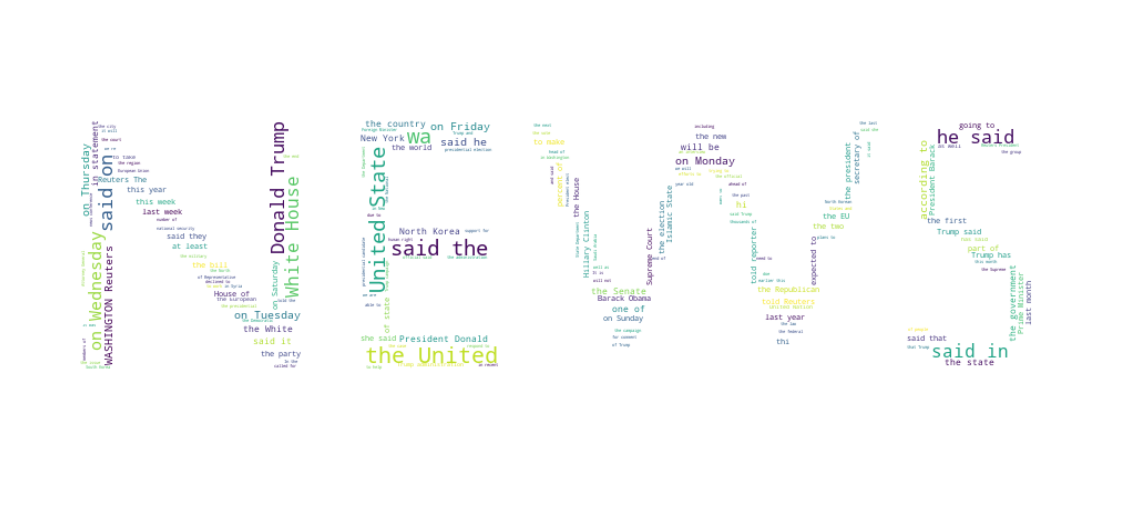

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image 
text = str
text = " ".join(review for review in true.text)
mask = np.array(Image.open("/kaggle/input/image-file-for-fake-news/news.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,max_font_size=200,contour_color='black')
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

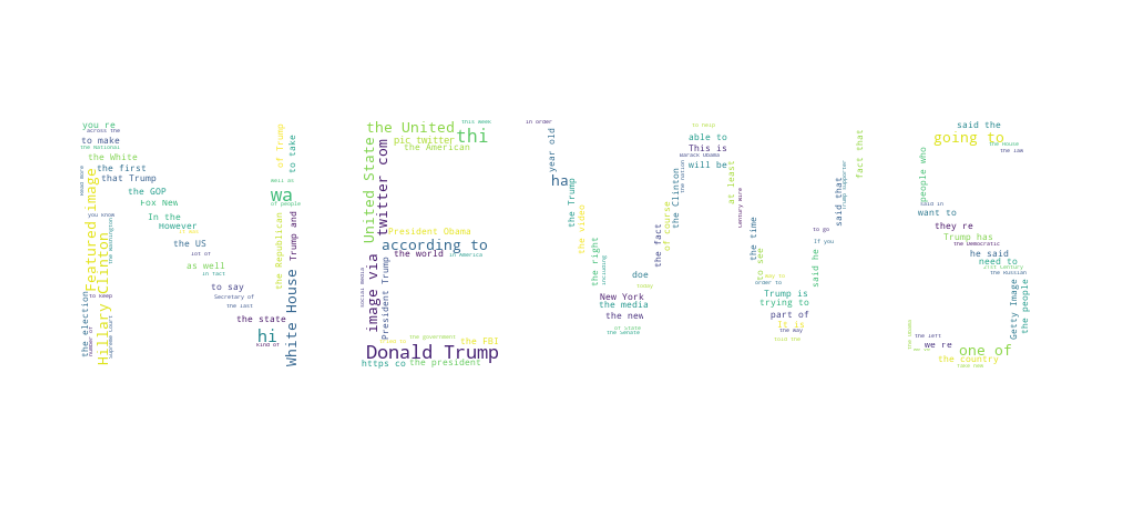

In [66]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image 
text = str
text = " ".join(review for review in fake.text)
mask = np.array(Image.open("/kaggle/input/image-file-for-fake-news/news.png"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,max_font_size=200,contour_color='black')
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [68]:
true['result'] = [1 for i in range(0,len(true))]

In [69]:
true.shape

(21417, 5)

In [70]:
fake['result'] = [0 for i in range(0,len(fake))]

In [71]:
fake.head()

,title,text,subject,date,result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [72]:
fake.shape

(23481, 5)

In [73]:
# club both the files
data = true.append(fake,ignore_index = True,sort=False)

In [74]:
true.shape

(21417, 5)

In [75]:
data.head()

,title,text,subject,date,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [76]:
data.tail()

,title,text,subject,date,result
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   result   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


info() shows that there is no null object. so this cuts down one of the steps of data preprocessing.
since columns are object type(strings) feature scaling is also obviously not required.

lets have a look at our data subject wise

In [78]:
data['subject'].nunique()
# this shows we have 8 subjects

8

In [79]:
data['subject'].unique()


array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

**lets find out that which subject has maximum  true news**
this can not be done for fake news as subject for all news is 'news' there

In [80]:
true_politicnews=0
world_n=0
govt_n =0
us_n =0
middle_n=0
for i,j in zip(data['subject'],data['result']):
    if i==('politicsNews' or 'politics') and j==1:
        true_politicnews = true_politicnews +1
    if i==('worldnews') and j==1:
        world_n+=1
    if i==('Government News') and j==1:
        govt_n+=1
    if i==('US_News') and j==1:
        us_n+=1
    if i==('Middle-east') and j==1:
        middle_n+=1
print(true_politicnews)
print(world_n)
print(us_n)
print(govt_n)
print(middle_n)


11272
10145
0
0
0


wordcloud for political_news(true)

In [81]:
str =" "
for i,j in zip(data['subject'],data['text']):
    if i=='politicsNews':
        str += j


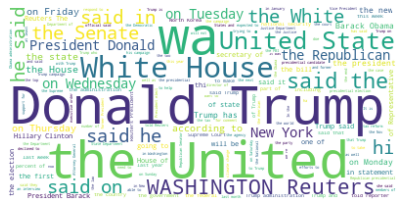

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# list_comp = [review if data[data['subject']=="politicsnews"] else ' ' for review in data['text']]
politics = str
wordcloud = WordCloud( background_color="white", max_words=1000).generate(politics)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [83]:
# we can have a look at the wordcloud for each of these subjects
# so lets group the data acc to subjects and then make wordclods for fake and true news.

**LETS WORK ON TEXT NOW**

In [84]:
# CLEANING THE TEXT COLUMN

i will concat titles and text columns and that column would be pre processed

In [85]:
# X = pd.concat(data['title'],data['text'])
data['combines'] = data['title']+" "+data['text']


In [86]:
df = data[['combines','result']]

# LOWERCASE

In [87]:
data['combines'] = data['combines'].apply(lambda word:word.lower())

# PUNCTUATIONS

In [88]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [89]:
def punctuation_removal(str1):
    list1 = [x for x in str1 if x not in string.punctuation]
    str2 = ''.join(list1)
    return str2
data['combines'] = data['combines'].apply(lambda word:punctuation_removal(word))

# STOPWORDS

In [90]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [91]:
df['combines'].apply(lambda x: [word for word in x if word not in stop])

0        [A,  , U, ., S, .,  , b, u, g, e,  , f, g, h, ...
1        [U, ., S, .,  , l, r,  ,  , c, c, e, p,  , r, ...
2        [S, e, n, r,  , U, ., S, .,  , R, e, p, u, b, ...
3        [F, B, I,  , R, u,  , p, r, b, e,  , h, e, l, ...
4        [T, r, u, p,  , w, n,  , P, l,  , S, e, r, v, ...
                               ...                        
44893    [M, c, P, n, :,  , J, h, n,  , M, c, C, n,  , ...
44894    [J, U, S, T, I, C, E, ?,  , Y, h,  , S, e, l, ...
44895    [S, u, n, n, n, :,  , U, S,  , n,  , A, l, l, ...
44896    [H, w,  ,  , B, l, w,  , $, 7, 0, 0,  , M, l, ...
44897    [1, 0,  , U, ., S, .,  , N, v,  , S, l, r,  , ...
Name: combines, Length: 44898, dtype: object

In [92]:
# seperate each word by white space
data['combines'] = data['combines'].apply(lambda word:word.split(','))

In [93]:
data['combines'].head(2)

0    [as us budget fight looms republicans flip the...
1    [us military to accept transgender recruits on...
Name: combines, dtype: object

In [94]:
# from nltk.tokenize import word_tokenize
# def to_words(text):
#     tokens = word_tokenize(text)
#     return tokens
# data['combines'] = data['combines'].apply(lambda s:to_words(s))


In [109]:
def convert(lst):       
    return ' , '.join(lst)

data['combines'] = data['combines'].apply(lambda s:convert(s))


# **STEMMING**

In [96]:
# # split into words
# from nltk.tokenize import word_tokenize
# def splitter(text):
#     tokens = word_tokenize(text)
#     return tokens
# data['combines'] = data['combines'].apply(lambda x:splitter(x))

In [97]:
# def convert(lst):       
#     return ' , '.join(lst)

# data['combines'] = data['combines'].apply(lambda s:convert(s))


In [98]:
# from nltk.stem.porter import PorterStemmer
# porter = PorterStemmer()
# def stem(tokens):
#     stemmed = [porter.stem(word) for word in tokens]
#     print(stemmed[:100])
# data['combines'] = data['combines'].apply(lambda x:stem(x))

In [110]:
data['combines'].head()

0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: combines, dtype: object

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

combine = CountVectorizer()
combine = combine.fit(data['combines'])

combined_vector = combine.transform(data['combines'])


In [112]:

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(combined_vector)
news_tfidf = tfidf_transformer.transform(combined_vector)
print(news_tfidf.shape)

(44898, 227319)


In [113]:
y = data['result']

In [114]:
xtrain,xtest,ytrain,ytest = train_test_split(news_tfidf,y,test_size =0.25,random_state=7)

# SVM

In [115]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier().fit(xtrain, ytrain)
predict_svm = svm.predict(xtest)


In [116]:
from sklearn.metrics import classification_report
print (classification_report(ytest, predict_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5836
           1       0.99      0.99      0.99      5389

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [117]:
from sklearn.metrics import confusion_matrix
final = confusion_matrix(predict_svm, ytest)

In [118]:
print(final)

[[5793   36]
 [  43 5353]]


In [119]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(ytest, predict_svm) )


Accuracy Score : 0.9929621380846325
